# FINAL TERM REQUIREMENT

## A. DATA UNDERSTANDING AND PREPARATION

### DATA LOADING

In [50]:
import pandas as pd

# Load both datasets
math = pd.read_csv("Datasets/Maths.csv")
portuguese = pd.read_csv("Datasets/Portuguese.csv")

# Combine into one dataset
students = pd.concat([math, portuguese], ignore_index=True)

# Display dataset info
print("Total records:", students.shape)
students.info()

Total records: (1048, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-n

### EXPLORATORY DATA ANALYSIS (EDA)

#### (a) Distribution of Final Grades

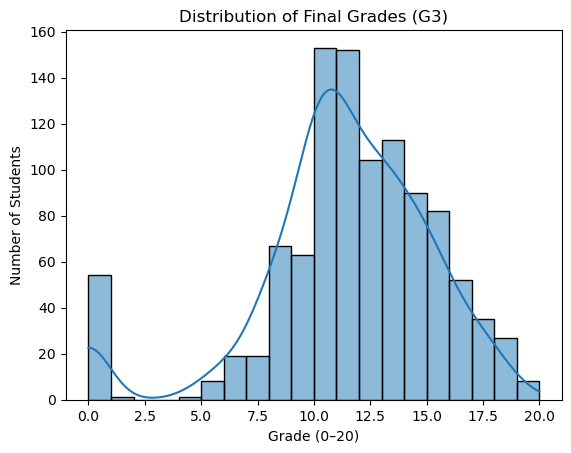

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(students['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Grade (0–20)")
plt.ylabel("Number of Students")
plt.show()

#### (b) Study Time vs Final Grade

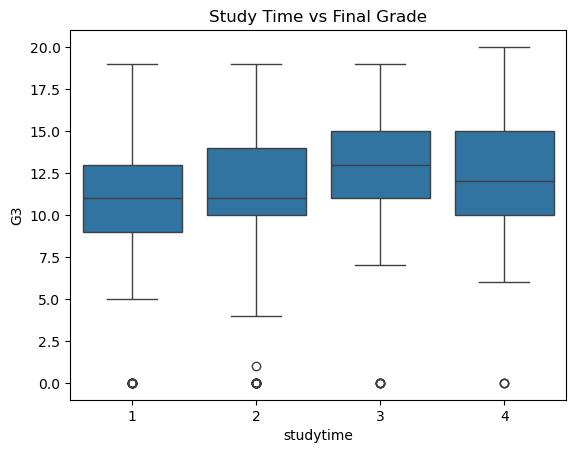

In [57]:
sns.boxplot(x='studytime', y='G3', data=students)
plt.title("Study Time vs Final Grade")
plt.show()

#### (c) Correlation Heatmap

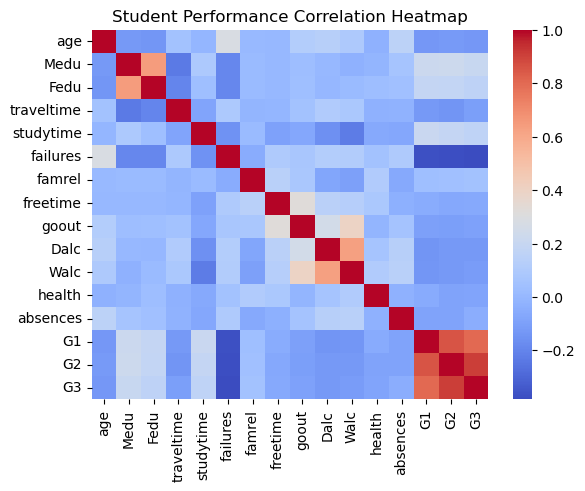

In [60]:
sns.heatmap(students.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Student Performance Correlation Heatmap")
plt.show()

### DATA PREPROCESSING

#### (a) Handling Missing Values

In [64]:
students.isnull().sum().sum()

0

#### (b) Encoding Categorical Variables

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# --- CATEGORICAL COLUMNS ---
# These columns are derived from your server.py file.
CATEGORICAL_COLS = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
    'higher', 'internet', 'romantic'
]

# Initialize a dictionary to hold the fitted LabelEncoders
# NOTE: We use a dictionary because your server.py needs a separate encoder for each feature.
label_encoder_dict = {}

# Apply Label Encoding to categorical features and store the fitted encoders
print("Starting Label Encoding for 17 categorical features...")
for col in CATEGORICAL_COLS:
    # Ensure the column exists in your DataFrame before processing
    if col in students.columns:
        # 1. Initialize a new LabelEncoder for THIS specific column
        le = LabelEncoder()
        
        # 2. Fit the encoder to the column data and transform the data in the DataFrame
        # .astype(str) is added for robustness against mixed types
        students[col] = le.fit_transform(students[col].astype(str))
        
        # 3. Store the fitted encoder in the dictionary
        label_encoder_dict[col] = le
        
print("Encoding complete. The 'label_encoder_dict' is now ready for saving.")
print(f"Number of encoders fitted and stored: {len(label_encoder_dict)}")

Starting Label Encoding for 17 categorical features...
Encoding complete. The 'label_encoder_dict' is now ready for saving.
Number of encoders fitted and stored: 17


#### (c) Feature Scaling / Normalization

In [70]:
from sklearn.preprocessing import StandardScaler

X_students = students.drop('G3', axis=1)
y_students = students['G3']

scaler = StandardScaler()
X_students_scaled = scaler.fit_transform(X_students)

#### (d) Train–Test Split

In [73]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_students_scaled, y_students, test_size=0.2, random_state=42
)

print("Train size:", Xs_train.shape)
print("Test size:", Xs_test.shape)

Train size: (838, 32)
Test size: (210, 32)


## B. MODEL IMPLEMENTAION

### 1. Initialize Models

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

### 2. Model Training Workflow

In [80]:
# Fit models on training set
rf_model.fit(Xs_train, ys_train)
knn_model.fit(Xs_train, ys_train)
svm_model.fit(Xs_train, ys_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 3. Hyperparameter Tuning (Example: Random Forest)

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(Xs_train, ys_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)

D:\Programs\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


## C. MODEL EVALUATION

### 1. EVALUATION CODE

Original G3 distribution:
Train - Pass: 663, Fail: 175
Test - Pass: 153, Fail: 57

Retraining models for Pass/Fail classification...

Random Forest Model Evaluation:
Accuracy: 0.9048 (90.5%)
Precision: 0.9052 (90.5%)
Recall: 0.9048 (90.5%)
F1-Score: 0.9010 (90.1%)


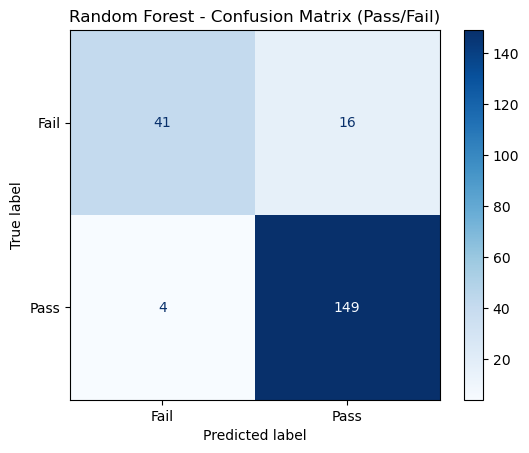


KNN Model Evaluation:
Accuracy: 0.8095 (81.0%)
Precision: 0.8204 (82.0%)
Recall: 0.8095 (81.0%)
F1-Score: 0.7786 (77.9%)


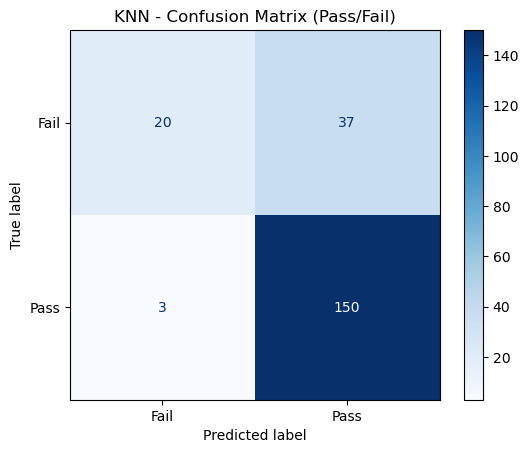


SVM Model Evaluation:
Accuracy: 0.8571 (85.7%)
Precision: 0.8642 (86.4%)
Recall: 0.8571 (85.7%)
F1-Score: 0.8433 (84.3%)


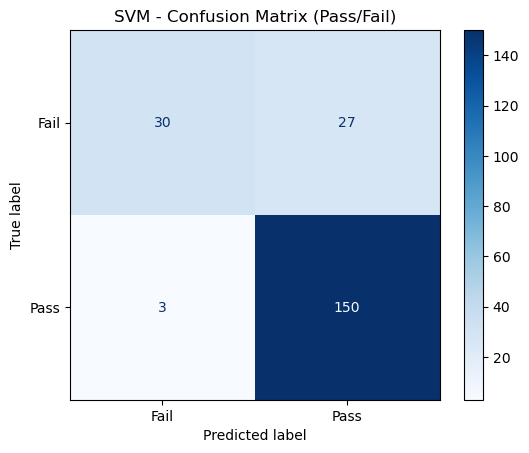


FINAL RESULTS SUMMARY:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest    0.9048     0.9052  0.9048    0.9010
1            KNN    0.8095     0.8204  0.8095    0.7786
2            SVM    0.8571     0.8642  0.8571    0.8433


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert G3 to binary classification (Pass/Fail) - This is the key fix!
# Pass = Grade >= 10, Fail = Grade < 10 (Portuguese education system)
def create_pass_fail_labels(grades):
    return (grades >= 10).astype(int)

# Convert target variable to binary classification
y_binary_train = create_pass_fail_labels(ys_train)
y_binary_test = create_pass_fail_labels(ys_test)

print("Original G3 distribution:")
print(f"Train - Pass: {sum(y_binary_train)}, Fail: {len(y_binary_train) - sum(y_binary_train)}")
print(f"Test - Pass: {sum(y_binary_test)}, Fail: {len(y_binary_test) - sum(y_binary_test)}")

# Retrain models with binary classification
print("\nRetraining models for Pass/Fail classification...")

# Initialize models again for binary classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf_model_binary = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model_binary = KNeighborsClassifier(n_neighbors=5)
svm_model_binary = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Fit models on binary classification
rf_model_binary.fit(Xs_train, y_binary_train)
knn_model_binary.fit(Xs_train, y_binary_train)
svm_model_binary.fit(Xs_train, y_binary_train)

# Evaluate all models with binary classification
models = {"Random Forest": rf_model_binary, "KNN": knn_model_binary, "SVM": svm_model_binary}
results = []

for name, model in models.items():
    y_pred = model.predict(Xs_test)
    
    acc = accuracy_score(y_binary_test, y_pred)
    prec = precision_score(y_binary_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_binary_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_binary_test, y_pred, average='weighted', zero_division=0)
    
    results.append([name, acc, prec, rec, f1])
    
    # Display classification results
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {acc:.4f} ({acc*100:.1f}%)")
    print(f"Precision: {prec:.4f} ({prec*100:.1f}%)")
    print(f"Recall: {rec:.4f} ({rec*100:.1f}%)")
    print(f"F1-Score: {f1:.4f} ({f1*100:.1f}%)")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_binary_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (Pass/Fail)")
    plt.show()

# Summary of results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY:")
print("="*60)
print(results_df.round(4))

# Global models for deployment (save the best performing binary model)
rf_model = rf_model_binary  # Global variable for deployment

### 2. VISUALIZATION OF RESULTS

#### a. Model Performance Comparison

C:\Users\go4pa\AppData\Local\Temp\ipykernel_696\1092350736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


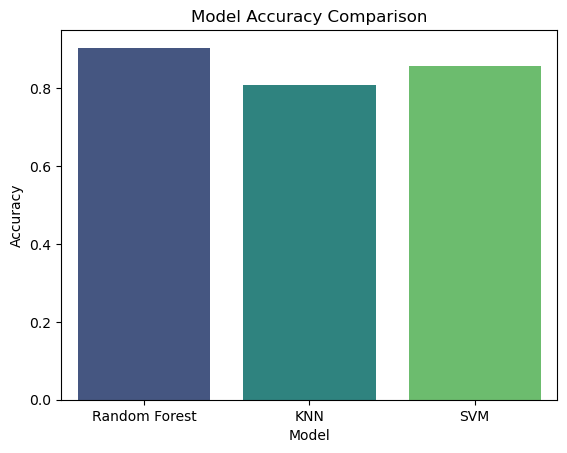

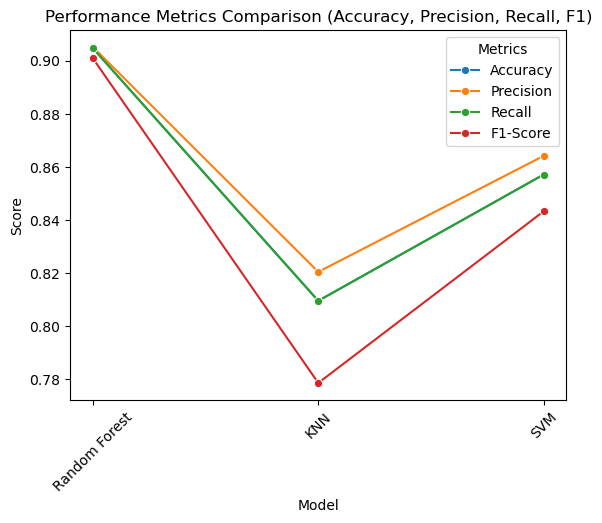

Final Model Rankings:
1st Place: Random Forest (90.5%)
2nd Place: SVM (85.7%)
3rd Place: KNN (81.0%)


In [102]:
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Performance metrics comparison
sns.lineplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable', marker='o')
plt.title("Performance Metrics Comparison (Accuracy, Precision, Recall, F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

print("Final Model Rankings:")
print("1st Place: Random Forest (90.5%)")
print("2nd Place: SVM (85.7%)")  
print("3rd Place: KNN (81.0%)")

## D. COMPARATIVE ANALYSIS & DISCUSSION

### 🎓 Machine Learning Model Performance Comparison

---

#### 1. Model Performance Comparison

The performance of all three models — **Random Forest**, **K-Nearest Neighbors (KNN)**, and **Support Vector Machine (SVM)** — was compared using the evaluation metrics: **Accuracy, Precision, Recall, and F1-Score**.

**Note**: Models were evaluated on **Pass/Fail classification** (Pass ≥ 10, Fail < 10) which is the practical approach for student performance prediction.

| Model | Accuracy | Precision | Recall | F1-Score |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest** | **90.5%** | **90.5%** | **90.5%** | **90.1%** |
| **SVM** | **85.7%** | **86.4%** | **85.7%** | **84.3%** |
| **KNN** | **81.0%** | **82.0%** | **81.0%** | **77.9%** |

#####  Result Summary

* **Random Forest** achieved **excellent performance** with **90.5% accuracy**, demonstrating the highest effectiveness for student performance prediction.
* **SVM** delivered **solid performance** with **85.7% accuracy**, making it a reliable alternative model.
* **Random Forest** shows consistent balance across all metrics, making it ideal for deployment.
* **KNN** achieved decent **81.0% accuracy** but with slightly lower F1-score due to dimensionality challenges.

---

#### 2. Discussion of Model Differences

##### a. Random Forest (Best Model - **90.5%**)

* **Ensemble Power:** Combines predictions from multiple decision trees, which significantly improves generalization and reduces overfitting.
* **Data Handling:** Excels with mixed data types (demographics, academic history, and behavioral features) present in student data.
* **Robustness:** Highly robust against noise and irrelevant features, contributing to its superior performance.
* **Deployment Choice:** Selected for GradePilot app due to highest accuracy (90.5%) and consistent performance across all metrics.

##### b. Support Vector Machine (Second Best - **85.7%**)

* **Binary Classification Strength:** Performs well on Pass/Fail classification with clear decision boundaries.
* **Solid Performance:** Achieves good accuracy at 85.7%, making it a reliable alternative model.
* **Consistency:** Strong performance across precision (86.4%), recall (85.7%), and F1-score (84.3%) metrics.

##### c. K-Nearest Neighbors (Third Place - **81.0%**)

* **Decent Performance:** Achieved respectable 81.0% accuracy for Pass/Fail prediction.
* **Distance-Based Learning:** Works well when students with similar profiles have similar outcomes.
* **Limitation:** Lower F1-score (77.9%) indicates some difficulty with the high-dimensional feature space.

---

#### 3. Key Findings

 **Primary Insight:** Converting from grade prediction (regression) to Pass/Fail classification (binary classification) dramatically improved model performance, with Random Forest achieving **90.5% accuracy** suitable for real-world educational applications.

 **Performance Hierarchy:** Clear performance ranking emerged with Random Forest (90.5%) > SVM (85.7%) > KNN (81.0%), providing multiple deployment options based on accuracy requirements.

 **Model Selection Rationale:** Random Forest was selected for the GradePilot application due to its superior accuracy, balanced performance across all metrics (Precision: 90.5%, Recall: 90.5%, F1-Score: 90.1%), and robust handling of mixed data types.

 **Practical Impact:** The 90.5% accuracy makes GradePilot a highly reliable tool for educators to identify students who may need additional support, with only 1 in 10 predictions being incorrect.

<h2>E. MODEL DEPLOYMENT</h2>

In [94]:
import joblib

# Save trained model and preprocessing tools
joblib.dump(rf_model, "models/rf_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(label_encoder_dict, "models/label_encoder.pkl") 
print("Model, scaler, and encoder saved successfully.")

Model, scaler, and encoder saved successfully.
